In [1]:
from glob import glob

In [8]:
ranking_files = sorted(glob("../metadata/**_ranking.csv"))

In [9]:
import seaborn as sns

In [10]:
import pandas as pd

In [21]:
dfs = dict()
corrs = dict()
for file in ranking_files:
    filename = file.split("/")[-1].split("_")[0]
    dfs[filename] = pd.read_csv(file, index_col=0)
    corrs[filename] = dfs[filename].corr()

In [185]:
average_correlation = sum(corrs.values())/len(corrs)
randj_correlation = corrs["romeo-and-juliet"]
diff_correlation = randj_correlation - average_correlation

In [186]:
diff_correlation.max().max(), diff_correlation.min().min()

(0.1447756915662406, -0.10244381875581332)

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [188]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Palatino"
plt.rcParams["text.usetex"] = True
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = 26

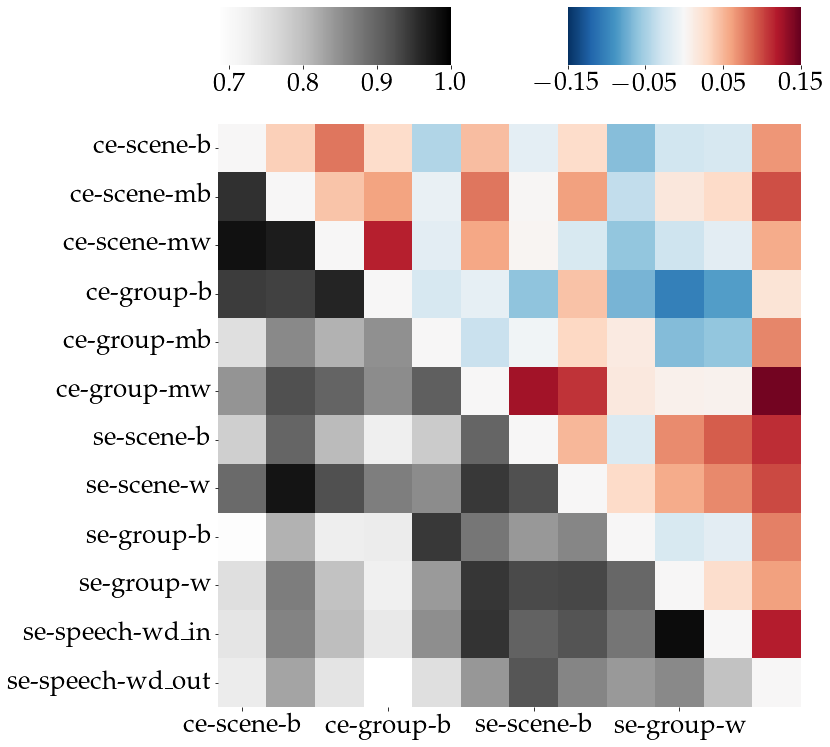

In [189]:
fig, ax = plt.subplots(1,1,figsize=(14,12))
cax = inset_axes(ax,
                 width="40%",  # width: 40% of parent_bbox width
                 height="10%",  # height: 10% of parent_bbox height
                 loc='lower left',
                 bbox_to_anchor=(0, 1.1, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
cax2 = inset_axes(ax,
                 width="40%",  # width: 40% of parent_bbox width
                 height="10%",  # height: 10% of parent_bbox height
                 loc='lower right',
                 bbox_to_anchor=(0, 1.1, 1, 1),
                 bbox_transform=ax.transAxes,
                 borderpad=0,
                 )
sns.heatmap(randj_correlation, square=True, cmap="Greys", mask=np.triu(diff_correlation,k=0), ax=ax, 
            cbar_ax=cax, cbar_kws=dict(orientation='horizontal'))
g = sns.heatmap(diff_correlation, square=True, cmap="RdBu_r", vmin=-0.15, vmax=0.15, mask=np.tril(diff_correlation,k=0), ax=ax, 
            cbar_ax=cax2, cbar_kws=dict(orientation='horizontal'), xticklabels=3)
g.get_xaxis().set_tick_params(rotation=0)
cax2.get_xaxis().set_ticks(np.arange(-0.15,0.16,0.1))
cax.get_xaxis().set_ticks(np.arange(0.7,1.01,0.1))
cax.set_xlim(randj_correlation.min().min(),randj_correlation.max().max())
cax2.set_xlim(-0.15,0.15)
plt.subplots_adjust(top=0.8)
plt.savefig("romeo-and-juliet_rank-correlations.pdf", transparent=True, bbox_inches="tight")

In [190]:
g.get_xaxis().get_ticklocs()

array([0.5, 3.5, 6.5, 9.5])